<a href="https://colab.research.google.com/github/connorpheraty/DS-Unit-1-Sprint-3-Data-Storytelling/blob/master/Connor_Heraty_DS_Unit_1_Sprint_Challenge_3_Data_Storytelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 3

# Data Storytelling

In this sprint challenge you'll work with a dataset from **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)**!

# Part 0 — Run this starter code

You don't need to add or change anything here. Just run this cell and it loads the data for you, into a dataframe named `df`.

(You can explore the data if you want, but it's not required to pass the Sprint Challenge.)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv'
df = pd.read_csv(url).rename(columns={'YEAR': 'Year', 'Raw_Guest_List': 'Guest'})

def get_occupation(group):
    if group in ['Acting', 'Comedy', 'Musician']:
        return 'Acting, Comedy & Music'
    elif group in ['Media', 'media']:
        return 'Media'
    elif group in ['Government', 'Politician', 'Political Aide']:
        return 'Government and Politics'
    else:
        return 'Other'
      
df['Occupation'] = df['Group'].apply(get_occupation)

In [32]:
!pip install --upgrade seaborn

    100% |████████████████████████████████| 215kB 26.7MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1


In [3]:
import seaborn as sns
sns.__version__

'0.9.0'

# Part 1 — What's the breakdown of guests’ occupations per year?

For example, in 1999, what percentage of guests were actors, comedians, or musicians? What percentage were in the media? What percentage were in politics? What percentage were from another occupation?

Then, what about in 2000? In 2001? And so on, up through 2015.

So, **for each year of _The Daily Show_, calculate the percentage of guests from each occupation:**
- Acting, Comedy & Music
- Government and Politics
- Media
- Other

#### Hints:
You can make a crosstab. (See pandas documentation for examples, explanation, and parameters.)

You'll know you've calculated correctly when the percentage of "Acting, Comedy & Music" guests is 90.36% in 1999, and 45% in 2015.

**Optional Bonus Challenge:** Do additional insightful data exploration.

In [4]:
# Explore what our dataframe looks like
df.head()

,Year,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
0,1999,actor,1/11/99,Acting,Michael J. Fox,"Acting, Comedy & Music"
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard,"Acting, Comedy & Music"
2,1999,television actress,1/13/99,Acting,Tracey Ullman,"Acting, Comedy & Music"
3,1999,film actress,1/14/99,Acting,Gillian Anderson,"Acting, Comedy & Music"
4,1999,actor,1/18/99,Acting,David Alan Grier,"Acting, Comedy & Music"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2693 entries, 0 to 2692
Data columns (total 6 columns):
Year                         2693 non-null int64
GoogleKnowlege_Occupation    2667 non-null object
Show                         2693 non-null object
Group                        2662 non-null object
Guest                        2693 non-null object
Occupation                   2693 non-null object
dtypes: int64(1), object(5)
memory usage: 126.3+ KB


### The exact percentages of "Acting, Comedy, and Music" guests is 90.3614% in 1999 and 45% for 2015.

In [6]:
# Make a crosstable from the 'Year' and 'Occupation' columns.
# Normalize by index to see the percentages by year.
df_occup = pd.crosstab(df.Year, df.Occupation, normalize='index')
df_occup

Occupation,"Acting, Comedy & Music",Government and Politics,Media,Other
Year,,,,
1999,0.903614,0.012048,0.066265,0.018072
2000,0.739645,0.082840,0.124260,0.053254
2001,0.726115,0.038217,0.197452,0.038217
2002,0.622642,0.069182,0.264151,0.044025
2003,0.560241,0.102410,0.246988,0.090361
2004,0.384146,0.225610,0.274390,0.115854
2005,0.370370,0.160494,0.333333,0.135802
2006,0.360248,0.192547,0.291925,0.155280
2007,0.255319,0.170213,0.333333,0.241135


## Exploratory analysis


Let's see what else we can find in the data!

In [0]:
df_grouped = (df
            .groupby('Group')
            .Group.agg('count'))

An exploratory bar graph shows 'The Daily Show' guests are heavily comprised of actors and members of the media!

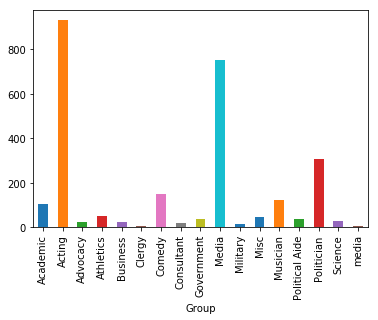

In [8]:
df_grouped.plot(kind='bar');

A an exploratory line graph reveals that the mix of guest backgrounds on the daily show skewed heavily towards actors, comedians, and musicians in during the shows initial seasons. During the shows latter years, the mix was much more balanced. 

Guests with backgrounds in Government and Politics have peaks during election seasons (seen most notably during presidential election years), and troughs during non-election years. 

Members of the media comprised of nearly 50% of all guests during 2008 coinciding with Obama's election. Their peak appearances in 2008 coincided with the lowest amount of appearances of actors, comedians, and musicians.

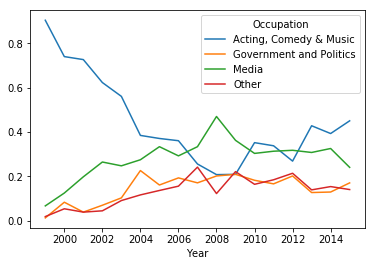

In [9]:
df_occup.plot();

# Part 2 — Recreate this explanatory visualization:

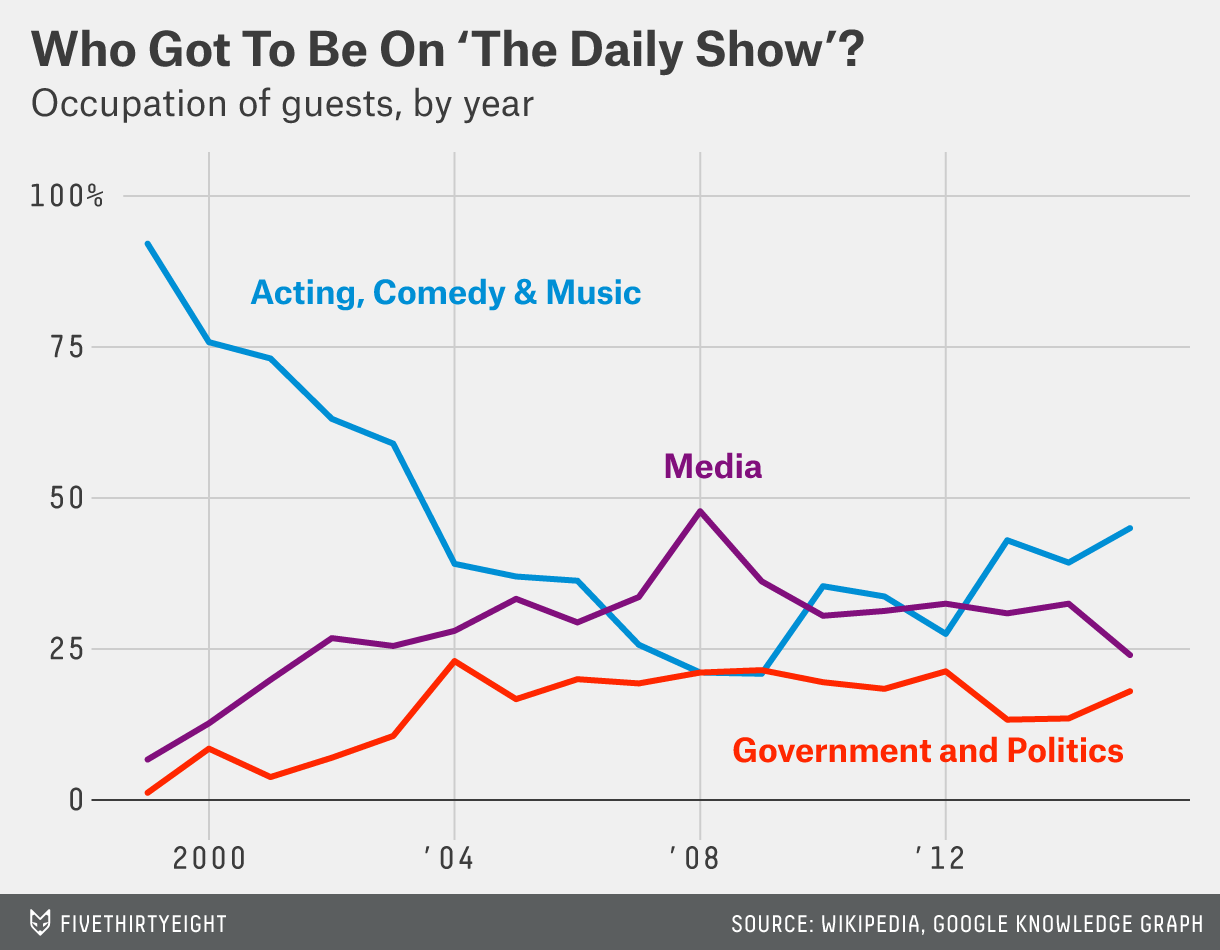

In [10]:
from IPython.display import display, Image
png = 'https://fivethirtyeight.com/wp-content/uploads/2015/08/hickey-datalab-dailyshow.png'
example = Image(png, width=500)
display(example)

**Hints:**
- You can choose any Python visualization library you want. I've verified the plot can be reproduced with matplotlib, pandas plot, or seaborn. I assume other libraries like altair or plotly would work too.
- If you choose to use seaborn, you may want to upgrade the version to 0.9.0.

**Expectations:** Your plot should include:
- 3 lines visualizing "occupation of guests, by year." The shapes of the lines should look roughly identical to 538's example. Each line should be a different color. (But you don't need to use the _same_ colors as 538.)
- Legend or labels for the lines. (But you don't need each label positioned next to its line or colored like 538.)
- Title in the upper left: _"Who Got To Be On 'The Daily Show'?"_ with more visual emphasis than the subtitle. (Bolder and/or larger font.)
- Subtitle underneath the title: _"Occupation of guests, by year"_

**Optional Bonus Challenge:**
- Give your plot polished aesthetics, with improved resemblance to the 538 example.
- Any visual element not specifically mentioned in the expectations is an optional bonus.

In [0]:
# Create new dataframe with only columns contained in example graph
df_occup = df_occup[[ 'Acting, Comedy & Music', 'Government and Politics', 'Media']] * 100

In [12]:
# Verify correct columns
df_occup.head()

Occupation,"Acting, Comedy & Music",Government and Politics,Media
Year,,,
1999,90.361446,1.204819,6.626506
2000,73.964497,8.284024,12.426036
2001,72.611465,3.821656,19.745223
2002,62.264151,6.918239,26.415094
2003,56.024096,10.240964,24.698795


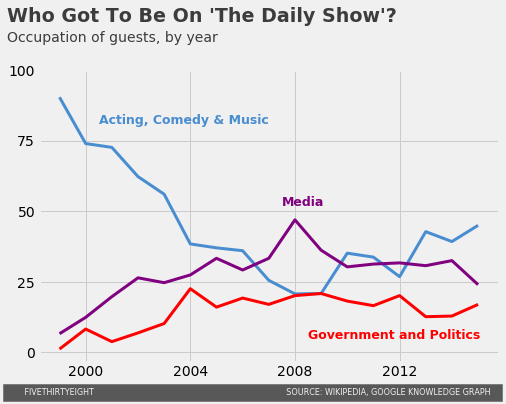

In [25]:
# New instance of fig and ax
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(7.35,5))

# Plotting the lines
ax.plot(df_occup['Acting, Comedy & Music'], color='#498dd1', linewidth=3)
ax.plot(df_occup['Government and Politics'], color='red', linewidth=3)
ax.plot(df_occup['Media'], color='purple', linewidth=3)

# Set x and y ticks to be similar to example
ax.set(yticks=range(0, 125, 25), xticks=range(2000, 2014, 4))


# Add text for title, subtitle, and each individual line
ax.text(x = 1997, y = 117,
    s ="Who Got To Be On 'The Daily Show'?",
    fontsize = 19, weight = 'bold', alpha=.75)

ax.text(x = 1997, y = 110,
    s ="Occupation of guests, by year",
    fontsize = 14, alpha=.75)

ax.text(x = 2000.5, y = 81,
    s ='Acting, Comedy & Music',
    fontsize = 12.5, color='#498dd1',
       weight='bold')

ax.text(x = 2008.5, y = 5,
    s ='Government and Politics',
    fontsize = 12.5, color='red',
       weight='bold')

ax.text(x = 2007.5, y = 52,
    s ='Media',
    fontsize = 12.5, color='purple',
       weight='bold')


#Add informational bar at bottom of graph
ax.text(x = 1997, y = -15, 
    s = '       FIVETHIRTYEIGHT                                                                             SOURCE: WIKIPEDIA, GOOGLE KNOWLEDGE GRAPH   ',
    fontsize = 8, color = '#f0f0f0', backgroundcolor = '#585859')


plt.show();

## Our graph is close to identical!

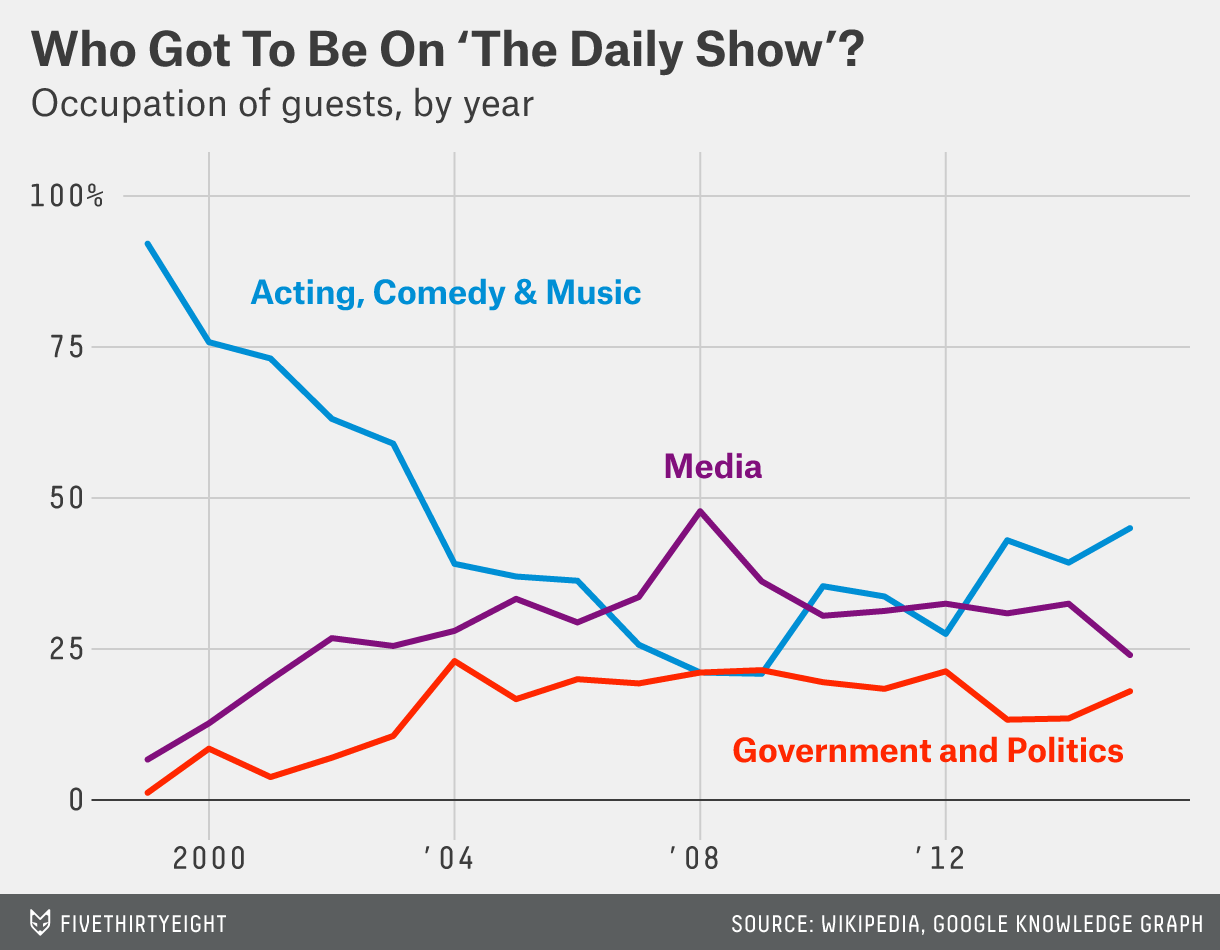

In [14]:
# Fivethirtyeight graph for reference
display(example)

# Part 3 — Who were the top 10 guests on _The Daily Show_?

**Make a plot** that shows their names and number of appearances.

**Add a title** of your choice.

**Expectations:** It's ok to make a simple, quick plot: exploratory, instead of explanatory. 

**Optional Bonus Challenge:** You can change aesthetics and add more annotation. For example, in a relevant location, could you add the text "19" to show that Fareed Zakaria appeared 19 times on _The Daily Show_? (And so on, for each of the top 10 guests.)

In [15]:
# value count check for reference

df['Guest'].value_counts().head(10)

Fareed Zakaria    19
Denis Leary       17
Brian Williams    16
Ricky Gervais     13
Paul Rudd         13
Tom Brokaw        12
Bill O'Reilly     10
Will Ferrell      10
Reza Aslan        10
Richard Lewis     10
Name: Guest, dtype: int64

In [16]:
# create a groupby dataframe that lists 
guest_grouped = (df
            .groupby('Guest')
            .Guest.agg(['count']))

# sort values from highest to lowest
top10_guest = guest_grouped.sort_values(by='count', ascending=False).head(10)
top10_guest

,count
Guest,
Fareed Zakaria,19
Denis Leary,17
Brian Williams,16
Paul Rudd,13
Ricky Gervais,13
Tom Brokaw,12
Richard Lewis,10
Bill O'Reilly,10
Will Ferrell,10


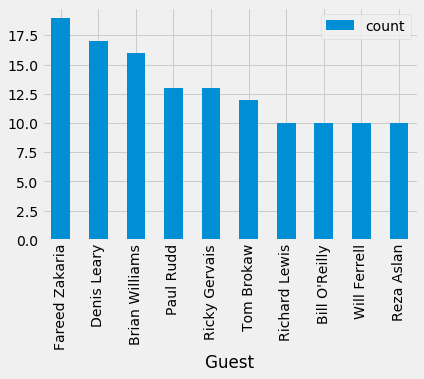

In [17]:
# Exploratory pandas graph
top10_guest.plot.bar();

In [0]:
# Reset index and rename columns for better description
top10_guest = top10_guest.reset_index()
top10_guest = top10_guest.rename({'count': 'Number of Appearances'}, axis=1)

In [19]:
top10_guest.head()

,Guest,Number of Appearances
0,Fareed Zakaria,19
1,Denis Leary,17
2,Brian Williams,16
3,Paul Rudd,13
4,Ricky Gervais,13


## Final visualization



This graph depicts the top 10 guests on 'The Daily Show' in bar graph form and also has the number of appearances each bar  for easy reference.

In [22]:
import altair as alt

bars = alt.Chart(top10_guest,height=400,width=700, title="Top 10 Guests on 'The Daily Show'").mark_bar().encode(
    alt.X('Guest', sort=alt.EncodingSortField(field='count', op='count', order='ascending')),
    alt.Y("Number of Appearances")
)

text = bars.mark_text(
    align='center',
    baseline='bottom',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text='Number of Appearances'
)

(bars + text).properties(height=900)

LayerChart({
  height: 900,
  layer: [Chart({
    data:             Guest  Number of Appearances
    0  Fareed Zakaria                     19
    1     Denis Leary                     17
    2  Brian Williams                     16
    3       Paul Rudd                     13
    4   Ricky Gervais                     13
    5      Tom Brokaw                     12
    6   Richard Lewis                     10
    7   Bill O'Reilly                     10
    8    Will Ferrell                     10
    9      Reza Aslan                     10,
    encoding: EncodingWithFacet({
      x: X({
        shorthand: 'Guest',
        sort: EncodingSortField({
          field: 'count',
          op: 'count',
          order: 'ascending'
        })
      }),
      y: Y({
        shorthand: 'Number of Appearances'
      })
    }),
    height: 400,
    mark: 'bar',
    title: "Top 10 Guests on 'The Daily Show'",
    width: 700
  }), Chart({
    data:             Guest  Number of Appearances
    0  Fareed Zakaria                     19
    1     Denis Leary                     17
    2  Brian Williams                     16
    3       Paul Rudd                     13
    4   Ricky Gervais                     13
    5      Tom Brokaw                     12
    6   Richard Lewis                     10
    7   Bill O'Reilly                     10
    8    Will Ferrell                     10
    9      Reza Aslan                     10,
    encoding: EncodingWithFacet({
      text: Text({
        shorthand: 'Number of Appearances'
      }),
      x: X({
        shorthand: 'Guest',
        sort: EncodingSortField({
          field: 'count',
          op: 'count',
          order: 'ascending'
        })
      }),
      y: Y({
        shorthand: 'Number of Appearances'
      })
    }),
    height: 400,
    mark: MarkDef({
      align: 'center',
      baseline: 'bottom',
      dx: 3,
      type: 'text'
    }),
    title: "Top 10 Guests on 'The Daily Show'",
    width: 700
  })]
})